---

# i. Perkenalan

=======================================================

Graded Challenge 4

Nama : Jeni Kasturi

Batch : FTDS_BSD_2

Memprediksi harga suatu perjalanan dari database [Uber and Lyft Dataset Boston, MA]('https://www.kaggle.com/datasets/brllrb/uber-and-lyft-dataset-boston-ma')

=======================================================


- **Latar Belakang :**

    Pada zaman modern seperti sekarang ini sudah sangat umum bagi kita melihat adanya transportasi online, terutama bagi kota-kota besar yang padat penduduknya. Transportasi online sangat dibutuhkan bagi masyarakat untuk bepergian dari satu tempat menuju tempat yang lain, salah satunya perusahaan besar `Uber` dan `Lyft` yang bergerak dibidang transportasi berbasis online. Sama halnya dengan kebanyakan perusahaan lain, kedua perusahaan tersebut selalu bersaing untuk memenuhi kebutuhan masyarakat baik dari segi layanan, harga, maupun yang lainnya.

- **Problem Statement :**

    Database ini memiliki banyak variabel yang terdapat pada dataset yang mempengaruhi kecenderungan pelanggan untuk memilih menggunakan jasa kendaraan online `Uber` atau `Lyft`. Dengan membandingkan kedua perusahaan transportasi online tersebut, kita dapat mengetahui faktor-faktor apa saja yang mempengaruhi pendapatan dari kedua perusahaan tersebut. Selain itu, kita dapat membuat prediksi harga untuk dapat membandingkan antara harga prediksi dan harga asli dan memperoleh akurasi yang sesuai.

- **Objective :**

    Project ini bertujuan untuk mengetahui faktor-faktor apa saja yang mempengaruhi dalam memprediksi suatu harga perjalanan pada `'Uber'` dan `'Lfty'`, serta mendapatkan hasil prediksi dengan menggunakan *model regensi linear* sesuai dengan yang diharapkan dengan hasil Goodfit pada akhir test.

----

# ii. Import Libraries


import semua library yang dibutuhkan dalam project

In [1]:
# import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import pickle
import json
from sklearn.model_selection import train_test_split 
from feature_engine.outliers import Winsorizer  # Capping normal dan skewed distribution
from sklearn.preprocessing import MinMaxScaler  # scalling
from sklearn.linear_model import LinearRegression   # Linear Regression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score   # model evaluation(menghitung hasil evaluasi)
from sklearn.preprocessing import MinMaxScaler  # MinMaxScaler
from sklearn.preprocessing import OneHotEncoder  # Metode OneHotEncoder


---

# iii. Data Loading

Pada bagian data loading ini kita akan memuat dan menampilkan dataset `Uber` dan `Lfty` yang kita ambil dari [kaggle]('https://www.kaggle.com/datasets/brllrb/uber-and-lyft-dataset-boston-ma') yang berisikan banyak kolom. 

Duplikat datanya agar tidak merubah data aslinya, bisa kita lihat tampilan tabelnya dibawah ini :

In [2]:
# Muat kumpulan data
df_rideshare_ori = pd.read_csv('rideshare_kaggle.csv')

# Duplikat data ori
df_1 = df_rideshare_ori.copy()

# Tampilkan semua kolom
pd.set_option('display.max_columns',None)
df_1.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.033,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


Setelah menampilkan dataset, langkah selanjutnya yaitu kita tampilkan terlebih dahulu list nama apa saja yang terdapat pada tabel agar kita bisa dengan mudah mengubah tipedatanya dan mendrop data yang kemungkinan tidak kita perlukan/data yang tidak ada kaitannya dengan prediksi harga.

In [3]:
# Untuk menampilkan list nama kolom apa saja yang terdapat pada tabel
df_1.columns

Index(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone',
       'source', 'destination', 'cab_type', 'product_id', 'name', 'price',
       'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperat

**Keterangan dataset :**

Dari dataset diatas terdiri dari 57 kolom, yaitu sebagai berikut:

| Nama Kolom | Deskripsi |
|----------- | --------- |
|id| Nomor unik pengguna/pelanggan  |
|timestamp| Unik waktu pada setiap perjalanan pelanggan |
|hour| Jam perjalanan dimulai |
|day| Hari perjalanan dimulai |
|month| Bulan perjalanan dimulai |
|datetime| Waktu ketika perjanlanan di mulai |
|timezone| Zona dimana waktu perjalanan digunakan |
|source| Lokasi/sumber awal memulai perjalanan |
|destination| Tujuan dari perjalanan |
|cab_type| Jenis Layanan transportasi online yang digunakan (Uber atau Lyft) |
|product_id| Kode unik dari layanan yang digunakan |
|name| Jenis kendaraan yang digunakan |
|price| Harga setiap perjalanan |
|distance| Jarak yang di tempuh satuan mil |
|surge_multiplier| Kenaikan harga perjalanan |
|latitude| lokasi awal gps berdasarkan koordinat garis lintang |
|longitude| lokasi awal gps berdasarkan koordinat garis bujur  |
|temperature| Suhu Lokasi |
|apparentTemperature| Suhu yang dirasakan dilokasi |
|short_summary| Kondisi ringkasan singkat cuaca di lokasi awal |
|long_summary| Kondisi ringkasan cuaca sepajang hari |
|precipIntensity| intensitas curah hujan/presipitasi di lokasi awal perjalanan |
|precipProbability| Perkiraan kemungkinan cuaca dilokasi awal |
|humidity| kelembaban udara di lokasi awal |
|windSpeed| Kecepata angin di lokasi awal |
|windGust| Perkiraan berapa rata-rata angin di lokasi |
|windGustTime| Perkiraan waktu kecepatan angin |
|visibility| Jarak penglihat/jarak pandang dilokasi awal |
|temperatureHigh| Temperatur tertinggi pada lokasi awal |
|temperatureHighTime| Perkiraan waktu temperatur tertinggi  |
|temperatureLow| Temperatur terendah |
|temperatureLowTime| Perkiraan waktu temperatur terendah |
|apparentTemperatureHigh| Suhu temperatur tertinggi |
|apparentTemperatureHighTime| Perkiraan waktu temperatur tertinggi yang akan dirasakan |
|apparentTemperatureLow| Suhu temperatur terendah |
|apparentTemperatureLowTime| Perkiraan waktu temperatur terendah yang akan dirasakan |
|icon| Ikon Cuaca |
|dewPoint| Titik embun |
|pressure| Tekanan udara dalam satuan millibar |
|windBearing| Arah tiupan angin  |
|cloudCover| Persentase langit yang tertutup awan |
|uvIndex| Indeks radiasi ultraviolet (UV) yang mengukur berapa tingkat paparan UV matahari |
|visibility.1| Jarak pandang yang mengukur sejauh mana objek terlihat dalam satuan mil |
|ozone| Konsentrasi ozon di atmosfer |
|sunriseTime| Waktu kapan matahari terbit |
|sunsetTime| Waktu kapan matahari terbenam |
|moonPhase| Fase bulan dalam skala 0 sampai 1 |
|precipIntensityMax| Intensitas curah hujan maksimum yang diperkirakan |
|uvIndexTime| waktu ketika indeks radiasi ultraviolet (UV) mencapai nilai tertinggi |
|temperatureMin| Suhu minimum yang diperkirakan dalam satuan (°F) |
|temperatureMinTime| Waktu ketika suhu minimum terjadi |
|temperatureMax| Waktu ketika suhu tertinggi terjadi dalam satuan (°F) |
|temperatureMaxTime| Waktu ketika suhu maksimum terjadi |
|apparentTemperatureMin| Suhu minimum yang dirasakan pada hari itu dalam satuan (°F) |
|apparentTemperatureMinTime| Waktu ketika suhu minimum yang dirasakan terjadi |
|apparentTemperatureMax| Suhu maksimum yang dirasakan pada hari itu dalam satuan (°F) |
|apparentTemperatureMaxTime| waktu ketika suhu maksimum yang dirasakan terjadi |

Setelah kita tampilkan daftar nama kolomnya, langkah selanjutnya yaitu kita lihat type data dari setiap kolomnya, apakah sudah sesuai typedatanya dengan kolomnya atau tidak.

In [4]:
# untuk menampilkan list nama kolom apa saja yang terdapat pada tabel dan melihat isi 
# tabel apakah tabelnya terisi value atau tidak,dan apa saja typedatanya

df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

Dari keterangan diatas, dapat kita simpulkan bahwa data berisikan :
- Terdapat 57 kolom
- Bertipe Float(64) 29 kolom, Integer(64) 17 kolom , Datetime(64) 1 kolom dan object 10 kolom
- Memiliki 693071 baris
- Dan terdapat missing value pada kolom `Price`

Setelah melihat keterangan apa saja pada data diatas, langkah selanjutnya yaitu kita ubah tipedatanya.

In [5]:
# Ubah tipedata menjadi datetime
df_1['datetime']=pd.to_datetime(df_1['datetime'])

# tampilkan datanya kembali untuk melihat perubahan tipedatanya
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   id                           693071 non-null  object        
 1   timestamp                    693071 non-null  float64       
 2   hour                         693071 non-null  int64         
 3   day                          693071 non-null  int64         
 4   month                        693071 non-null  int64         
 5   datetime                     693071 non-null  datetime64[ns]
 6   timezone                     693071 non-null  object        
 7   source                       693071 non-null  object        
 8   destination                  693071 non-null  object        
 9   cab_type                     693071 non-null  object        
 10  product_id                   693071 non-null  object        
 11  name                      

Mengubah tipedata pada kolom datetime yang sebelumnya `object` menjadi tipedata `datetime`.

Langkah selanjutnya kita cek dataset menggunakan `.describe()` untuk melihat kolom mana saja yang terdapat angka saja.

In [6]:
# Check dataset (khusus kolom yang terdapat angka saja)
df_1.describe().T

,count,mean,std,min,25%,50%,75%,max
timestamp,693071.0,1.544046e+09,689192.492586,1.543204e+09,1.543444e+09,1.543737e+09,1.544828e+09,1.545161e+09
hour,693071.0,1.161914e+01,6.948114,0.000000e+00,6.000000e+00,1.200000e+01,1.800000e+01,2.300000e+01
day,693071.0,1.779436e+01,9.982286,1.000000e+00,1.300000e+01,1.700000e+01,2.800000e+01,3.000000e+01
month,693071.0,1.158668e+01,0.492429,1.100000e+01,1.100000e+01,1.200000e+01,1.200000e+01,1.200000e+01
price,637976.0,1.654513e+01,9.324359,2.500000e+00,9.000000e+00,1.350000e+01,2.250000e+01,9.750000e+01
distance,693071.0,2.189430e+00,1.138937,2.000000e-02,1.280000e+00,2.160000e+00,2.920000e+00,7.860000e+00
surge_multiplier,693071.0,1.013870e+00,0.091641,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00
latitude,693071.0,4.233817e+01,0.047840,4.221480e+01,4.235030e+01,4.235190e+01,4.236470e+01,4.236610e+01
longitude,693071.0,-7.106615e+01,0.020302,-7.110540e+01,-7.108100e+01,-7.106310e+01,-7.105420e+01,-7.103300e+01
temperature,693071.0,3.958439e+01,6.726084,1.891000e+01,3.645000e+01,4.049000e+01,4.358000e+01,5.722000e+01


Dari pengolahan describe diatas, dapat disimpulkan bahwa :

- Rata-rata harga pada kolom `price` yaitu ada di rentan 1.654513e+01
- Harga tertinggi pada kolom `price` yaitu ada di rentan 9.750000e+01
- Sedangkan harga terendah pada kolom `price` yaitu 2.500000e+00	


jika mean dan median(50%) dari kolom `price` itu mirip angkanya, kemungkinan besar normal distribution dan jika jauh maka termasuk skew distribution. Dari data diatas hasinya menentukan bahwa datanya termasuk skew distribution. Untuk lebih jelasnya bisa kita lakukan analisa pada *Feature Engineering*.

---

# iv. Exploratory Data Analysis (EDA)

Pada bagian EDA ini kita akan melakukan visualisasi data dan melakukan eksplorasi data menggunakan teknik aritmatika sederhana.

<function matplotlib.pyplot.show(close=None, block=None)>

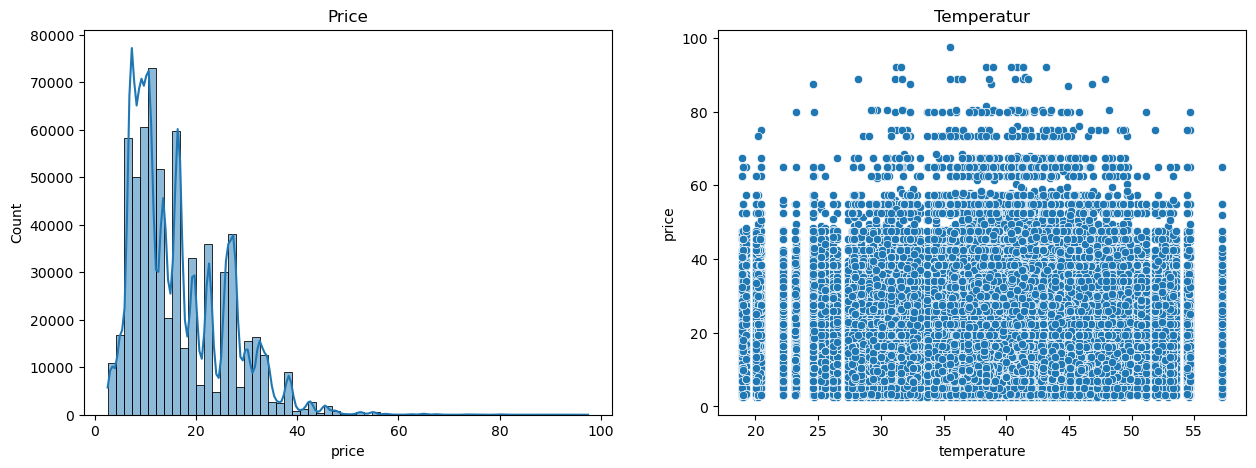

In [7]:
# Membuat Histogram dan Scatter Plot

# bikin kanvas
plt.figure(figsize=(15,5))                              #untuk bikin canvas, 15 itu panjangnya, 5 lebarnya

# Plot 1 taruh dikiri
plt.subplot(1, 2, 1)                                    #untuk bikin kolom 1 (1(untuk baris), 2(untuk kolom), 1(pilih kolom mana yang mau ditampilkan))
sns.histplot(df_1['price'],kde=True, bins=60)           #untuk bikin grafik, kde itu untuk bikin gari miringnya, binsnya itu banyak batangnya
plt.title('Price')                                      #judul grafik

# Plot 2 taruh dikanan
plt.subplot(1, 2, 2)                                    #untuk bikin kolom 2
sns.scatterplot(x='temperature',y='price',data=df_1)    #untuk bikin grafik
plt.title('Temperatur')

# tampilkan semua plot
plt.show

Bisa kita lihat pada grafik Temperatur sebelah kanan, kolom `temperature` tidak memiliki korelasi dengan harga. Pada grafik `Price` diatas yang sebelah kiri, bahwa dari hasil grafik tersebut kemiringan garisnya jauh lebih condong ke kiri dan tidak merata, dapat kita simpulkan bahwa hasilnya MNAR. 

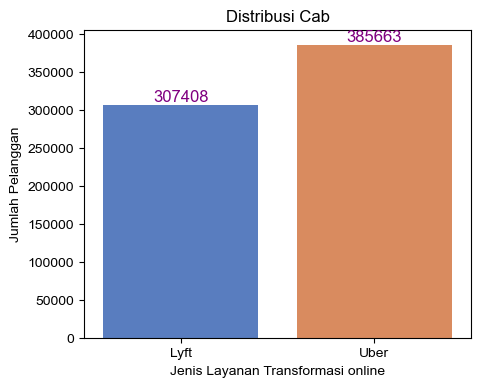

In [8]:
# Plot 3 
plt.figure(figsize=(5, 4))
ax = sns.countplot(x=df_1["cab_type"], palette="muted")
sns.set(style="whitegrid")                                      # Opsi ini menambahkan grid pada plot
ax.bar_label(ax.containers[0], color="purple", fontsize=12)     # Menambahkan label di atas bar
plt.title("Distribusi Cab")
plt.xlabel("Jenis Layanan Transformasi online")                 # Mengganti ylabel menjadi xlabel
plt.ylabel("Jumlah Pelanggan")
plt.show()                                                      # Menampilkan plot

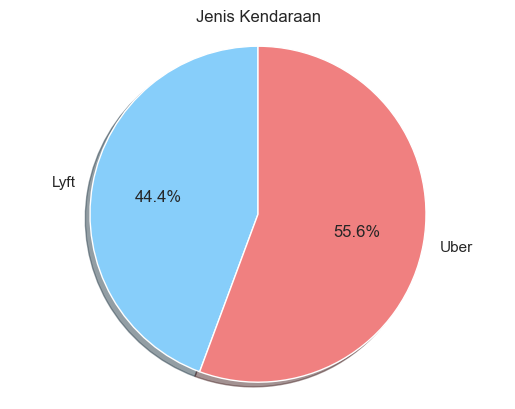

In [9]:
# Plot 4
surge_count = df_1.groupby('cab_type').size().reset_index(name='count')
colors = ['lightskyblue', 'lightcoral']

plt.title('Jenis Kendaraan')
plt.pie(data=surge_count, x='count', labels='cab_type', colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)

plt.axis('equal')
plt.show()

Dari hasil grafik diatas terlihat bahwa pengguna lebih banyak menggunakan Uber daripada Lfty sebagai kebutuhan alat transportasi ke tempat tujuan.

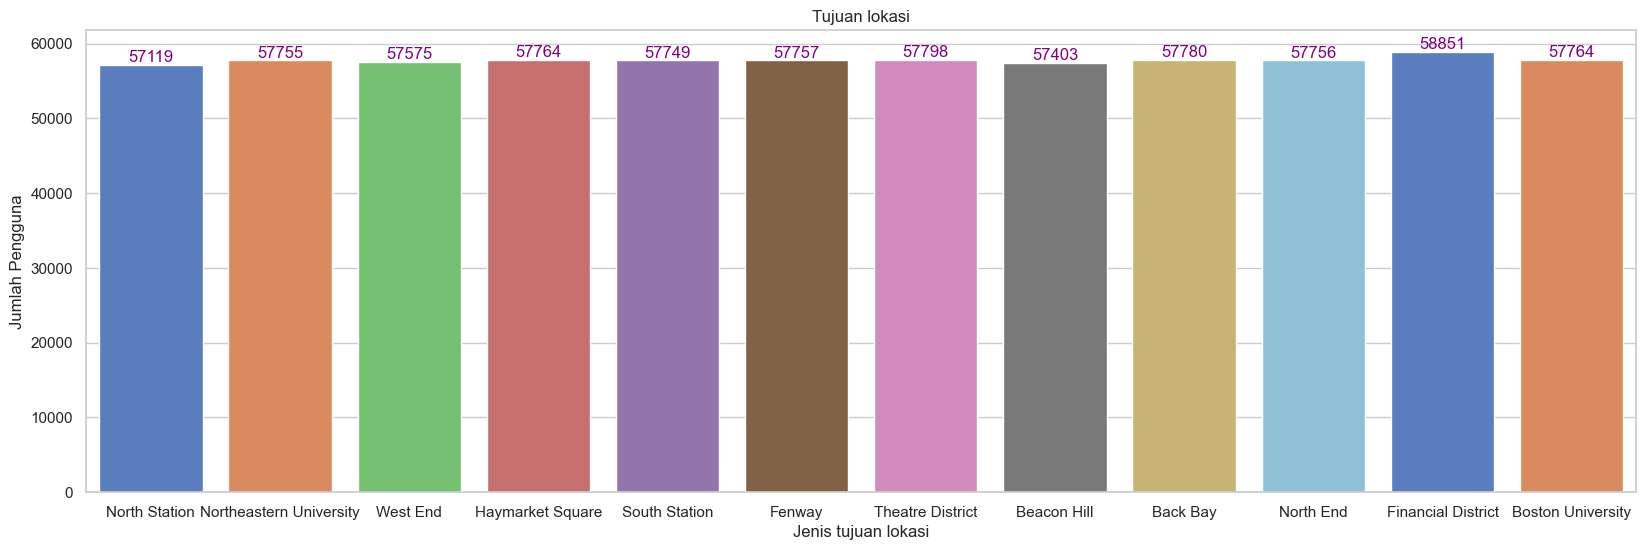

In [10]:
# Plot 5 
plt.figure(figsize=(20, 6))
ax = sns.countplot(x=df_1["destination"], palette="muted")
sns.set(style="whitegrid")                                      # Opsi ini menambahkan grid pada plot
ax.bar_label(ax.containers[0], color="purple", fontsize=12)     # Menambahkan label di atas bar
plt.title("Tujuan lokasi")
plt.xlabel("Jenis tujuan lokasi")                               # Mengganti ylabel menjadi xlabel
plt.ylabel("Jumlah Pengguna")
plt.show()                                                      # Menampilkan plot

Dari hasil grafik diatas dapat kita simpulkan bahwa pada kolom `destination` jenis tujuan lokasi yang paling sering dituju oleh pengguna adalah *Financial District*

In [11]:
# Groupby
name_count = df_1.groupby('name').size().sort_values(ascending= False).reset_index(name='price')
name_count

,name,price
0,Black SUV,55096
1,UberXL,55096
2,WAV,55096
3,Black,55095
4,Taxi,55095
5,UberX,55094
6,UberPool,55091
7,Lux,51235
8,Lux Black,51235
9,Lux Black XL,51235


Dari hasil diatas kita groupby kolom `name` dan kolom `price`nya agar bisa kita tampilkan grafiknya dan kita analisa apakah kolom `name` mempengaruhi harga.

<Axes: xlabel='price', ylabel='name'>

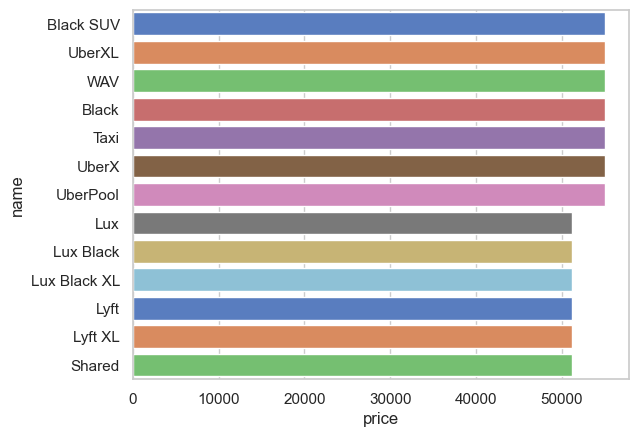

In [12]:
# Plot 6 
sns.barplot(data = name_count, x = 'price', y= 'name', palette="muted")


Dari hasil diatas dapat kita simpulkan bahwa jenis-jenis kendaraan pada kolom `name` itu berpengaruh ke harga.

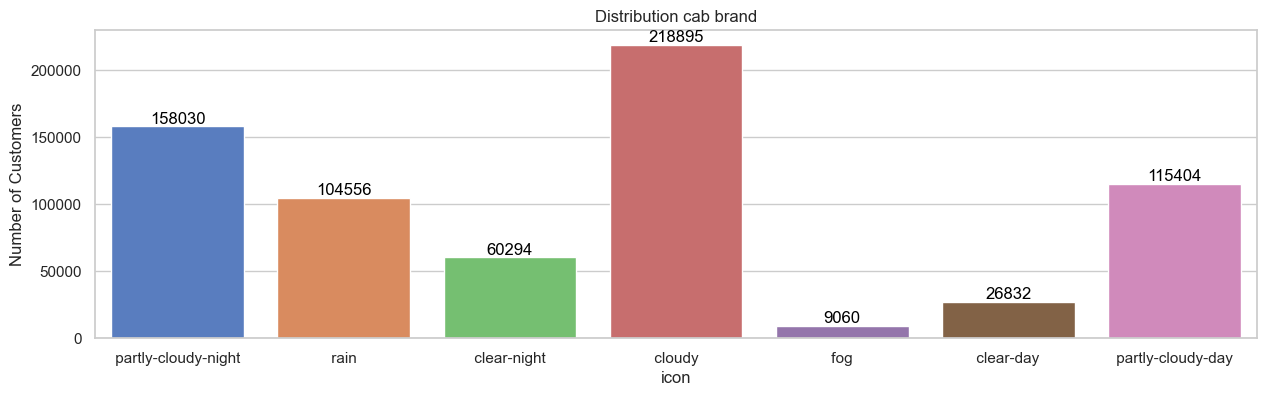

In [13]:
# Plot 7
plt.figure(figsize = (15,4))
ax = sns.countplot(x = df_1["icon"], palette="muted")
ax.bar_label(ax.containers[0], color = "black")
plt.title("Distribution cab brand")
plt.ylabel("Number of Customers")
plt.show()

Dapat disimpulkan dari grafik diatas bahwa pelanggan lebih sering menggunakan transportasi online pada saat keadaan cuacanya mendung/cloudly.

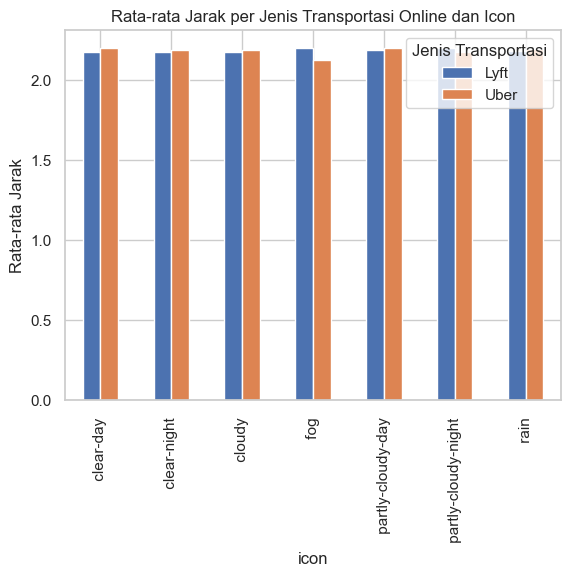

In [14]:
# Rumus grouping dalam satu kolom
grouped_data = df_1.groupby(['icon', 'cab_type'])['distance'].mean()

# Membuat diagram batang (bar chart)
grouped_data.unstack().plot(kind='bar')
plt.title('Rata-rata Jarak per Jenis Transportasi Online dan Icon')
plt.xlabel('icon')
plt.ylabel('Rata-rata Jarak')
plt.legend(title='Jenis Transportasi', title_fontsize='12', loc='upper right')
plt.show()

Dari hasil diagram diatas dapat kita simpulkan bahwa rata-rata jarak dalam rentan cuaca(icon) relatif sama dan hanya ada sedikit perbedaan.

---

# v. Feature Engineering

Pada bagian ini kita akan melakukan proses penyiapan data untuk memproses pelatihan model, contohnya seperti pembagian data `X` dan `y` nya, pembagian data train-test, transformasi data, dan proses lainnya yang dibutuhkan.

### 1. Handling Missing Values

Pada kolom `price` terdapat missing value, kita tampilkan dan analisa terlebih dahulu dimana saja letak missing valuenya. Kita handling missing valuenya terlebih dahulu dikarenakan missing valuenya terdapat pada kolom target `y` yaitu kolom `price`, oleh karena itu kita drop diawal sebelum kita split.

In [15]:
# Menampilkan missing values
pd.set_option('display.max_columns', None)
df_1[df_1['price'].isnull()]

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
18,fa5fb705-03a0-4eb9-82d9-7fe80872f754,1.543674e+09,14,1,12,2018-12-01 14:13:04,America/New_York,North End,West End,Uber,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,NaN,1.11,1.0,42.3647,-71.0542,36.99,32.27,Partly Cloudy,Light rain in the morning and overnight.,0.0,0.0,0.68,5.87,6.26,1543672800,9.910,44.66,1543690800,35.04,1543712400,43.99,1543690800,35.69,1543712400,partly-cloudy-day,27.53,1022.32,344,0.44,1,9.910,280.1,1543665331,1543698851,0.82,0.0000,1543683600,31.71,1543658400,44.66,1543690800,28.06,1543658400,43.99,1543690800
31,eee70d94-6706-4b95-a8ce-0e34f0fa8f37,1.543795e+09,23,2,12,2018-12-02 23:52:56,America/New_York,Beacon Hill,South Station,Uber,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,NaN,2.48,1.0,42.3588,-71.0707,48.83,48.83,Overcast,Light rain until evening.,0.0,0.0,0.96,2.83,2.98,1543755600,7.790,50.73,1543788000,44.99,1543816800,50.06,1543788000,45.64,1543816800,cloudy,47.81,1002.81,275,1.00,0,7.790,287.3,1543751797,1543785238,0.86,0.0904,1543770000,36.45,1543726800,50.73,1543788000,35.85,1543748400,50.06,1543788000
40,7f47ff53-7cf2-4a6a-8049-83c90e042593,1.543524e+09,20,29,11,2018-11-29 20:38:05,America/New_York,North Station,Fenway,Uber,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,NaN,2.94,1.0,42.3661,-71.0631,42.50,36.47,Partly Cloudy,Partly cloudy throughout the day.,0.0,0.0,0.54,10.68,17.15,1543514400,9.772,44.66,1543510800,28.68,1543575600,38.30,1543510800,27.26,1543568400,partly-cloudy-day,26.84,1008.44,314,0.35,0,9.772,307.4,1543492404,1543526094,0.75,0.0000,1543510800,35.15,1543550400,44.66,1543510800,30.98,1543550400,38.30,1543510800
60,43abdbe4-ab9e-4f39-afdc-31cfa375dc25,1.544732e+09,20,13,12,2018-12-13 20:10:16,America/New_York,North End,West End,Uber,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,NaN,1.16,1.0,42.3647,-71.0542,33.15,30.60,Mostly Cloudy,Partly cloudy throughout the day.,0.0,0.0,0.57,3.02,3.02,1544738400,9.956,33.83,1544731200,27.27,1544781600,32.85,1544734800,24.61,1544785200,partly-cloudy-day,19.51,1033.96,96,0.81,0,9.956,330.1,1544702792,1544735599,0.21,0.0001,1544716800,18.29,1544688000,33.83,1544731200,13.79,1544688000,32.85,1544734800
69,80db1c49-9d51-4575-a4f4-1ec23b4d3e31,1.543583e+09,13,30,11,2018-11-30 13:08:03,America/New_York,North End,Beacon Hill,Uber,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,NaN,2.67,1.0,42.3647,-71.0542,31.80,31.80,Clear,Mostly cloudy throughout the day.,0.0,0.0,0.83,2.10,4.79,1543554000,10.000,42.52,1543600800,31.71,1543658400,40.53,1543611600,28.06,1543658400,clear-day,27.14,1017.01,296,0.01,0,10.000,277.1,1543578867,1543612470,0.79,0.0003,1543593600,28.79,1543579200,42.52,1543600800,26.41,1543575600,40.53,1543611600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693025,70ad9983-92dd-4cdf-af16-732e7e9ee9d0,1.544887e+09,15,15,12,2018-12-15 15:15:13,America/New_York,South Station,Beacon Hill,Uber,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,NaN,2.50,1.0,42.3519,-71.0551,50.71,50.71,Mostly Cloudy,Mostly cloudy throughout the day.,0.0,0.0,0.83,3.55,4.79,1544918400,9.909,54.46,1544896800,39.29,1544954400,53.79,1544896800,35.17,154494

Bisa kita lihat dari hasil tampilan diatas terdapat missing value pada kolom `price` yang memiliki kategori jenis kendaaran *`Taxi`* pada kolom `name`, terdapat 55095 baris mising value dari total 693071 baris. Langkah selanjutnya kita hapus missing valuenya agar memudahkan kita dalam pemrosesan data.

In [16]:
# Drop baris yang memiliki missing value pada kolom price
df_1.dropna(axis=0,inplace=True)
df_1.isnull().sum()

id                             0
timestamp                      0
hour                           0
day                            0
month                          0
datetime                       0
timezone                       0
source                         0
destination                    0
cab_type                       0
product_id                     0
name                           0
price                          0
distance                       0
surge_multiplier               0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
short_summary                  0
long_summary                   0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatureHighTime            0
temperatur

### 2. Membuat sampel data inference

In [17]:
# menyimpan 1 data random dari data asli untuk digunakan sebagai data inference ke dalam variabel data_inf
data_inf = df_1.sample(1, random_state=42)

# menghapus data inference dari df
df_1.drop(data_inf.index, inplace=True)

# melakukan reset index untuk data_inf dan df
df_1.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)

# Export data Inference
data_inf.to_csv('data_inf.csv',index=False)

Untuk mendrop satu baris dari keseluruhan data yang nanti akan kita jadikan bahan untuk prediksi.

### 3. Split between columns X (Feature/Variables) and y (Target)

In [18]:
# Split antara 'X' dan 'y'
X = df_1.drop(['price'],axis=1)
y = df_1.price
X.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,0.44,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,0.44,1.0,42.2148,-71.033,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,0.44,1.0,42.2148,-71.033,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,0.44,1.0,42.2148,-71.033,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,0.44,1.0,42.2148,-71.033,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


Untuk memisahkan antara target dan fitur.

Variable (X) ini berisi berbagai kolom informasi tentang data uber dan lyfe seperti : 
- 'id'
- 'timestamp'
- 'hour'
- 'day'
- 'month'
- 'datetime'
- 'timezone'
- 'source'
- 'destination'
- 'cab_type'
- 'product_id'
- 'name'
- 'distance'
- 'surge_multiplier'
- 'latitude'
- 'longitude'
- 'temperature'
- 'apparentTemperature'
- 'short_summary'
- 'long_summary'
- 'precipIntensity'
- 'precipProbability'
- 'humidity'
- 'windSpeed'
- 'windGust'
- 'windGustTime'
- 'visibility'
- 'temperatureHigh'
- 'temperatureHighTime'
- 'temperatureLow'
- 'temperatureLowTime'
- 'apparentTemperatureHigh'
- 'apparentTemperatureHighTime'
- 'apparentTemperatureLow'
- 'apparentTemperatureLowTime'
- 'icon'
- 'dewPoint'
- 'pressure'
- 'windBearing'
- 'cloudCover'
- 'uvIndex'
- 'visibility.1'
- 'ozone'
- 'sunriseTime'
- 'sunsetTime'
- 'moonPhase'
- 'precipIntensityMax'
- 'uvIndexTime'
- 'temperatureMin'
- 'temperatureMinTime'
- 'temperatureMax'
- 'temperatureMaxTime'
- 'apparentTemperatureMin'
- 'apparentTemperatureMinTime'
- 'apparentTemperatureMax'
- 'apparentTemperatureMaxTime'

Variable (y) ini berisi data target yaitu :

kolom `price` yang akan digunakan pada label ini yaitu sebagai target(y) saat membangun model dalam melakukan analisis lebih lanjut.

### 4. Split between Train-set and Test-set

In [19]:
# Splitting between Train and Tet using 'train_test_split()'
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)     #test size 0.2 artinya 20% biasanya digunakan 0,2-0.25 dari seluruh data #random state harus di isi dengan nilai agar tidak berubah2 boleh dengan angka apapun

print('Train Size :', X_train.shape)
print('Test Size :', X_test.shape)

Train Size : (510380, 56)
Test Size : (127595, 56)


Setelah dilakukan split diatas, hasil Train Size adalah (510380, 56), dan Test Size adalah (127595, 56)

### 5. Outliers Handling

Saya melakukan outliers handling untuk menghandle outliers dengan menggunakan metode caping pada kolom `distance`, kolom `surge_multiplier` tidak dilakukan handling outliers dikarenakan datanya sedikit.

#### A. Check distribusi

Pada proses kali ini kita akan melakukan check distribusi pada kategori numerical untuk mengetahui mana yang skewness dan mana yang distribusinya normal.

pada bagian ini kita akan melakukan :
- Menentukan data distribusi apakah termasuk normal atau tidak normal
- Menampilkan distribusi melalui diagram/grafik
- Memastikan nilai upper wounder dan lower bounder
- Menghandling fitur/kolom yang memiliki outlier

In [20]:
# cek apakah distribusinya normal atau tidak
print('Distribution of column `distance`           : ', X_train['distance'].skew())
print('Distribution of column `distance`           : ', X_train['surge_multiplier'].skew())

Distribution of column `distance`           :  0.8163438973809052
Distribution of column `distance`           :  7.94511108741639


Dapat kita simpulkan bahwa kolom `source`, `cab_type` dan `name` merupakan normal distribution, sedangkan untuk kolom distance merupakan skew, yang berati memiliki outlier.

#### *- Menampilkan diagram distribusi* 

In [21]:
# membuat histogram dan boxplot dengan menggunakan kerangka data (df_1) dan variabel yang diinginkan sebagai argumen.

def diagnostic_plots(df_1, variable):
    # Tentukan ukuran gambar
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df_1[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df_1[variable])
    plt.title('Boxplot')

    plt.show()

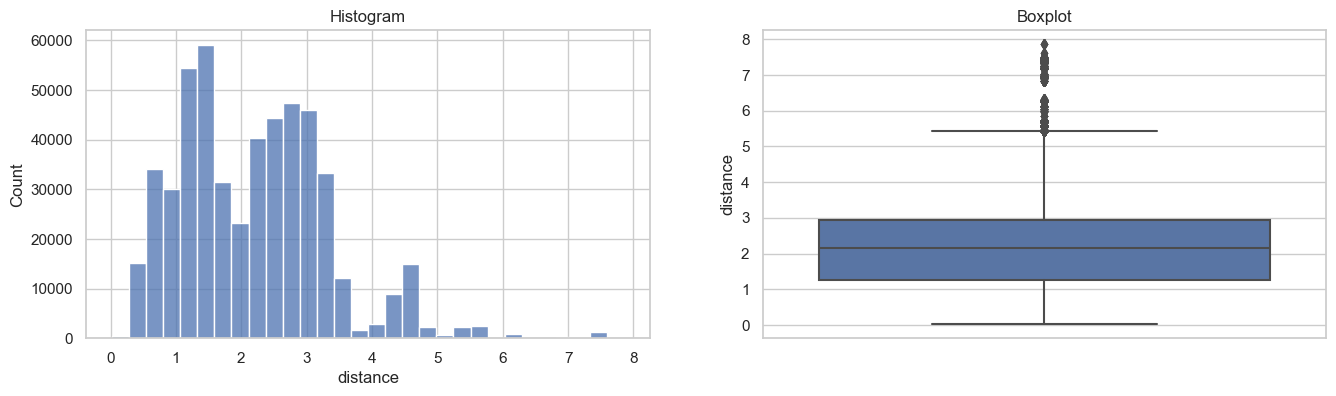

In [22]:
# visualisasi skewed distribution menggunakan boxplot
diagnostic_plots(X_train, 'distance')

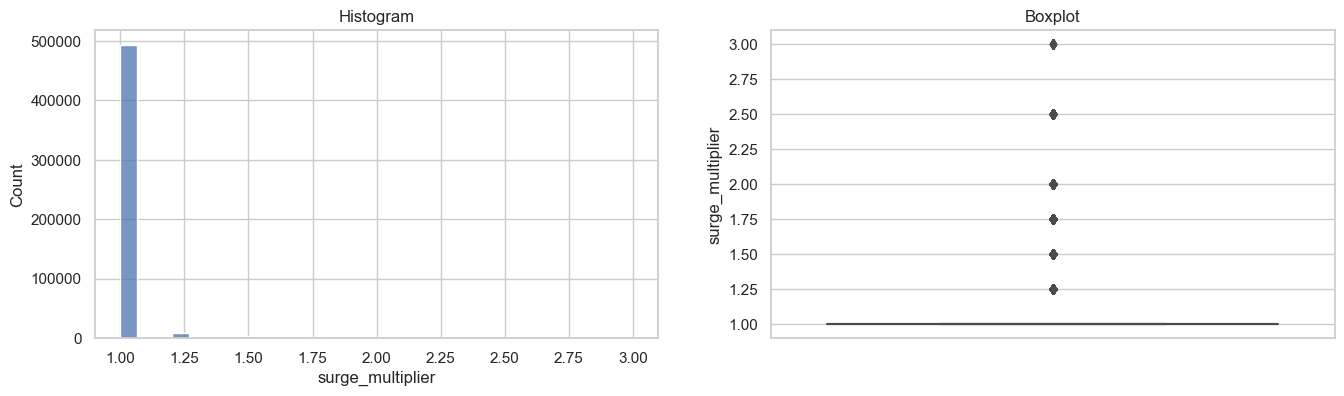

In [23]:
# visualisasi skewed distribution menggunakan boxplot
diagnostic_plots(X_train, 'surge_multiplier')

Bisa kita lihat dari diagram diatas terdapat outlier/distribusi skew pada kolom distance dan surge_multiplier.

#### *- Memastikan nilai upper bounder dan lower bounder*

Pada tahap ini kita akan memastikan nilai upper bound dan lower bound untuk menjaga validitas data kita, menghindari kesalahan perhitungan pada data, dan mematuhi batasan yang ada dalam konteks tertentu. Dalam hal ini kita periksa apakah data kita sudah di antara upper bounder atau belum.

In [24]:
# Berfungsi untuk mencari batas atas dan bawah variabel yang terdistribusi normal
def find_normal_boundaries(df_1, variable):
    # Hitung batas luar yang merupakan outlier untuk distribusi Gaussian
    upper_boundary = df_1[variable].mean() + 3 * df_1[variable].std()
    lower_boundary = df_1[variable].mean() - 3 * df_1[variable].std()

    return upper_boundary, lower_boundary

In [25]:
# Kolom distance
# Berfungsi untuk mencari batas atas dan bawah variabel yang terdistribusi miring/skewed
def find_skewed_boundaries(df_1, variable, distance):
    # Kita hitung batas luar yang merupakan outlier untuk distribusi yang miring
    IQR = df_1[variable].quantile(0.75) - df_1[variable].quantile(0.25)
    # Jarak yang dilewati sebagai argumen, memberi kita pilihan untuk memperkirakan 1,5 kali atau 3 kali IQR untuk menghitung batasannya.
    lower_boundary = df_1[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df_1[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [26]:
# Identifikasi outlier di `Fare` di kumpulan data raksasa. Mari kita lihat kembali nilai ekstrimnya dengan menggunakan IQR * 3
upper_boundary_fare, lower_boundary_fare = find_skewed_boundaries(X_train, 'distance', 3)
upper_boundary_fare, lower_boundary_fare

(7.91, -3.7100000000000004)

In [27]:
# Kolom surge_multiplier
# Berfungsi untuk mencari batas atas dan bawah variabel yang terdistribusi miring/skewed
def find_skewed_boundaries(df_1, variable, surge_multiplier):
    # Kita hitung batas luar yang merupakan outlier untuk distribusi yang miring
    IQR = df_1[variable].quantile(0.75) - df_1[variable].quantile(0.25)
    # Jarak yang dilewati sebagai argumen, memberi kita pilihan untuk memperkirakan 1,5 kali atau 3 kali IQR untuk menghitung batasannya.
    lower_boundary = df_1[variable].quantile(0.25) - (IQR * surge_multiplier)
    upper_boundary = df_1[variable].quantile(0.75) + (IQR * surge_multiplier)

    return upper_boundary, lower_boundary

In [28]:
# Identifikasi outlier di `Fare` di kumpulan data raksasa. Mari kita lihat kembali nilai ekstrimnya dengan menggunakan IQR * 3
upper_boundary_fare, lower_boundary_fare = find_skewed_boundaries(X_train, 'surge_multiplier', 3)
upper_boundary_fare, lower_boundary_fare

(1.0, 1.0)

Dapat kita simpulkan dari hasil diatas yaitu :

- Untuk kolom `distance` nilai uppernya (7.91) dan lowernya (-3.7100000000000004)
- Untuk kolom `surge_multiplier` nilai uppernya (1.0) dan lowernya (1.0) karena dia hanya memiliki 1 nilai unique.

#### B. Melakukan Capping

In [29]:
# Capping normal distribution

winsoriser_age = Winsorizer(capping_method='gaussian',
                            tail='both',
                            fold=3,
                            variables=['distance'],
                            missing_values='ignore')

X_train_capped = winsoriser_age.fit_transform(X_train)
X_test_capped = winsoriser_age.transform(X_test)

# Tampilkan skewness
print(f"Before: {X_train['distance'].skew()}")
print(f"After: {X_train_capped['distance'].skew()}")

Before: 0.8163438973809052
After: 0.6156062956353967


In [30]:
# Capping skewed distribution

winsoriser_fare = Winsorizer(capping_method='iqr',
                             tail='both',
                             fold=3,
                             variables=['distance'])

X_train_capped = winsoriser_fare.fit_transform(X_train_capped)
X_test_capped = winsoriser_fare.transform(X_test_capped)

# show skewness
print(f"Before: {X_train['distance'].skew()}")
print(f"After: {X_train_capped['distance'].skew()}")

Before: 0.8163438973809052
After: 0.6156062956353967


Bisa kita lihat dari hasil analisis diatas, dari sebelumnya (0.8163438973809052) menjadi sesudahnya (0.6156062956353967) , yang dimana capping ini berfungsi untuk meringankan machine learning dalam memprogres datasetnya. Untuk lebih jelasnya bisa kita lihat pada diagramnya.

distance - Sebelum Capping


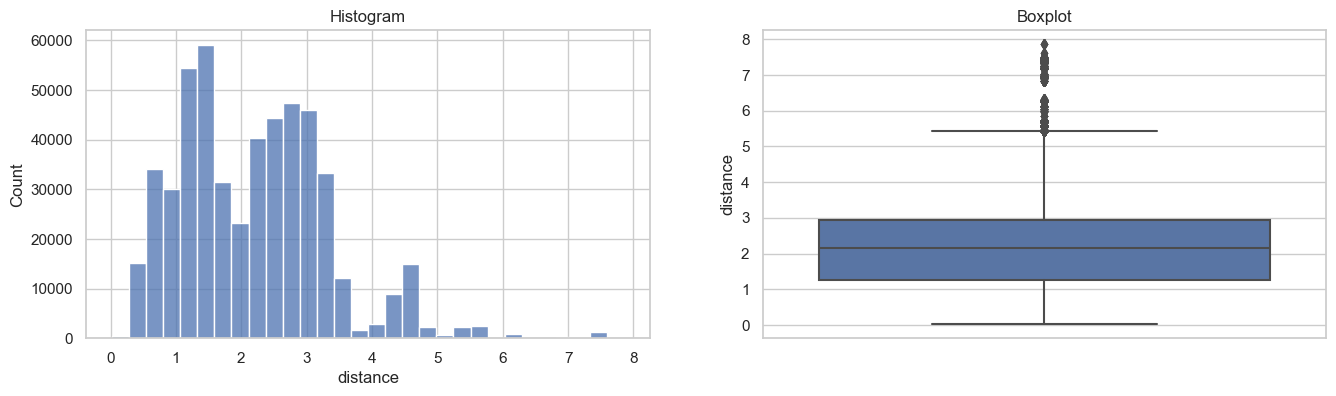


distance - Sesudah Capping


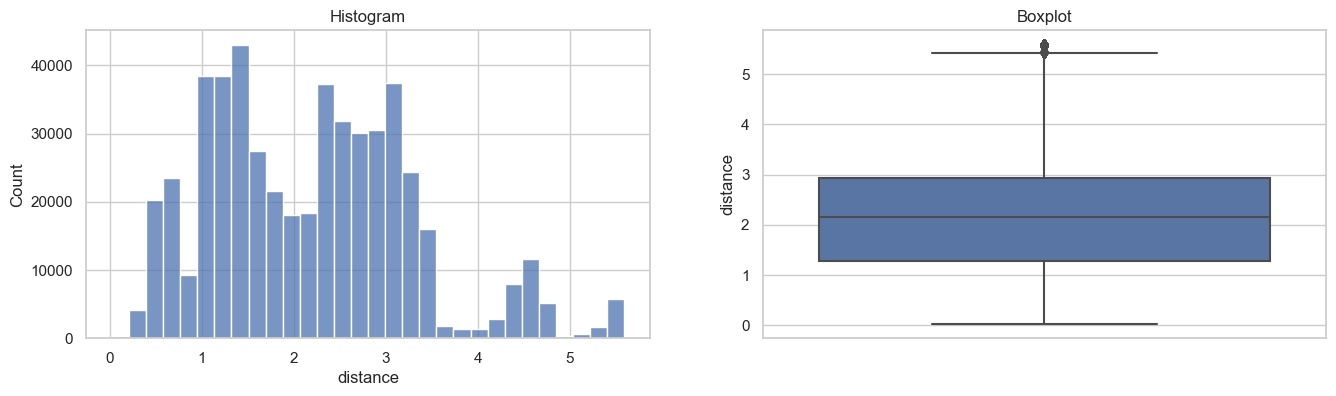

In [31]:
# menampilkan diagram sebelum di capping
print('distance - Sebelum Capping')
diagnostic_plots(X_train, 'distance')

# menampilkan diagram setelah di capping
print('\ndistance - Sesudah Capping')
diagnostic_plots(X_train_capped, 'distance')

### 6. Fiture Selection

Target yang akan kita capai yaitu membuat model regesi linear, hal yang pertama kita cari yaitu kolerasi antara kolom `price`(y) dan kolom numerik(X) yang lain, langkah yang akan kita lakukan adalah membuat hitmap, kemudian melihat apakah ada korelasi dengan melihat scor yang di dapat dari corelasi.

In [32]:
# Pilih kolom kategorikal
categorical_columns = X_train.select_dtypes(include=['object']).columns

# Tetapkan tingkat alfa
alpha = 0.05 # Critical Values

correlation_data_categorical = []

for cat_column in categorical_columns:
    # setting correlation dengan chi-square 
    contingency_table = pd.crosstab(X_train[cat_column], y_train) # membandingkan X-train, y-train
    chi2, p, _, _ = stats.chi2_contingency(contingency_table) # menghitung chi-square
    

    correlated = 'Yes' if p < alpha else 'No' #berdasarkan H0 dan H1

    correlation_data_categorical.append(
        {'categorical_column': cat_column, 'chi-square_statistic': chi2, 'p-value': p, 'correlated': correlated}
    )

correlation_data_categorical = pd.DataFrame(correlation_data_categorical)

# Tampilkan DataFrame yang dihasilkan
print(correlation_data_categorical)

  categorical_column  chi-square_statistic   p-value correlated
0                 id          7.145320e+07  0.495306         No
1           timezone          0.000000e+00  1.000000         No
2             source          7.422494e+04  0.000000        Yes
3        destination          7.238406e+04  0.000000        Yes
4           cab_type          3.110088e+05  0.000000        Yes
5         product_id          1.863687e+06  0.000000        Yes
6               name          1.863687e+06  0.000000        Yes
7      short_summary          1.158399e+03  0.207167         No
8       long_summary          1.462549e+03  0.119505         No
9               icon          7.908398e+02  0.886336         No


In [33]:
# Correleation 
# Pilih kolom kategorikal
numeric_columns = X_train.select_dtypes(exclude=['object'])

# Gabungkan kolom numerik dan variabel target
data_train = pd.concat([numeric_columns, y_train], axis=1)

# Hitung korelasi antara fitur numerik dan variabel target 'price'
corr_with_target = data_train.corr(method='kendall')['price'].sort_values(ascending=False)

C:\Users\W1OPro\AppData\Local\Temp\ipykernel_11076\1788443950.py:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_with_target = data_train.corr(method='kendall')['price'].sort_values(ascending=False)
c:\Users\W1OPro\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:5278: RuntimeWarning: overflow encountered in scalar multiply
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


Setelah kita dapatkan korelasinya,langkah selanjutnya yaitu memisahkan kolom mana saja yang kita butuhkan dan berpengaruh kepada harga perjalanan.

In [34]:
columns = ['source', 'destination', 'cab_type', 'name', 'distance', 'surge_multiplier']

# Gunakan .loc untuk memilih kolom yang diinginkan
X_train = X_train.loc[:, columns]
X_train.head()

,source,destination,cab_type,name,distance,surge_multiplier
318167,Financial District,Northeastern University,Uber,UberXL,7.46,1.0
85442,South Station,Beacon Hill,Lyft,Lyft,2.45,1.0
361906,South Station,Theatre District,Uber,Black SUV,1.30,1.0
398036,North End,North Station,Uber,Black SUV,0.92,1.0
88088,Back Bay,Fenway,Uber,WAV,1.34,1.0


kita drop kolom yang tidak berpengaruh pada harga di X-train.

In [35]:
columns = ['source', 'destination', 'cab_type', 'name', 'distance', 'surge_multiplier']

# Gunakan .loc untuk memilih kolom yang diinginkan
X_test = X_test.loc[:, columns]
X_test.head()

,source,destination,cab_type,name,distance,surge_multiplier
553180,Financial District,North End,Lyft,Shared,1.27,1.0
83732,Boston University,Beacon Hill,Uber,WAV,2.79,1.0
317993,North End,Beacon Hill,Lyft,Lyft,2.40,1.0
519149,Northeastern University,West End,Uber,WAV,2.86,1.0
219102,North End,West End,Uber,UberPool,1.10,1.0


kita drop kolom yang tidak berpengaruh pada harga di X-test.

### 7. Split kolom numerical dan kolom categorical

In [36]:
# Pisahkan antara Kolom Numerik dan Kategorikal

num_col = X_train.select_dtypes(include=np.number).columns.tolist()
cat_col = X_train.select_dtypes(include=['object']).columns.tolist()

print('Numerical column:',num_col)
print('Categorical column:',cat_col)

Numerical column: ['distance', 'surge_multiplier']
Categorical column: ['source', 'destination', 'cab_type', 'name']


Kita pisahkan kolom bagian numerik dan categorical di X-train.

In [37]:
# Split train set and tet set berdasarkan tipe kolom
X_train_num = X_train[num_col]
X_test_num = X_test[num_col]

X_train_cat = X_train[cat_col]
X_test_cat = X_test[cat_col]

X_train_num.head()

,distance,surge_multiplier
318167,7.46,1.0
85442,2.45,1.0
361906,1.30,1.0
398036,0.92,1.0
88088,1.34,1.0


Lalu kita split train set dan test set nya berdasarkan tipe kolom

Dari hasil diatas dapat kita simpulkan bahwa kita akan menggunakan kolom untuk memprediksi price adalah 6 kolom, yaitu :
- 'source' 
- 'destination'
- 'cab_type'
- 'name'
- 'distance'
- 'surge_multiplier'

### 8. Cek Cardinality

Langkah selanjutnya adalah kita cek cardinality.

In [38]:
# Cek Cardinality
pd.set_option('display.max_colwidth', None)
values = []
for col in X_train.select_dtypes(include='object').columns:
    values.append([col, X_train[col].nunique(), X_train[col].unique()])

pd.DataFrame(values, columns=['nama_kolom', 'jumlah_unique', 'nilai_unique'])

,nama_kolom,jumlah_unique,nilai_unique
0,source,12,"[Financial District, South Station, North End, Back Bay, Fenway, North Station, Boston University, Theatre District, Haymarket Square, Beacon Hill, West End, Northeastern University]"
1,destination,12,"[Northeastern University, Beacon Hill, Theatre District, North Station, Fenway, South Station, Haymarket Square, North End, Financial District, Boston University, West End, Back Bay]"
2,cab_type,2,"[Uber, Lyft]"
3,name,12,"[UberXL, Lyft, Black SUV, WAV, Lux, UberPool, UberX, Shared, Lyft XL, Black, Lux Black XL, Lux Black]"


Dari hasil diatas dapat kita simpulkan bahwa data merupakan data low cardinality karena dia memiliki sedikit categorical, jadi kita tidak perlu melakukan cardinality.

### 9. Feature Scaling

Pada bagian ini kita akan melakukan feature scalling untuk membuat numerical data pada dataset memiliki rentang nilai(scale) yang sama. Tidak ada lagi satu variabel data yang mendominasi variabel data lainnya.

In [39]:
# Display
X_train_cat.head()

,source,destination,cab_type,name
318167,Financial District,Northeastern University,Uber,UberXL
85442,South Station,Beacon Hill,Lyft,Lyft
361906,South Station,Theatre District,Uber,Black SUV
398036,North End,North Station,Uber,Black SUV
88088,Back Bay,Fenway,Uber,WAV


In [40]:
# scalling
scaler = MinMaxScaler()
scaler.fit(X_train_num)     # .fit hanya ada di train, tidak boleh ada di test karena akan ada kebocoran data/data leak !!

X_train_num_scaled = scaler.transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)

X_test_num_scaled

array([[0.15943878, 0.        ],
       [0.35331633, 0.        ],
       [0.30357143, 0.        ],
       ...,
       [0.32142857, 0.        ],
       [0.29464286, 0.        ],
       [0.30994898, 0.        ]])

Kenapa kita menggunakan metode MinMaxScaler? Alasannya yaitu :

- MinMaxScaler menskalakan data ke rentang tetap, biasanya antara 0 dan 1.

- Meskipun (0, 1) adalah rentang default, kita juga dapat menentukan rentang nilai maks dan min.

- MinMaxScaler akan mempertahankan bentuk kumpulan data (tidak ada distorsi).

- Kapan menggunakan :

    ➔ Ketika kita mengetahui sebaran datanya bukan Gaussian.
    
    ➔ Berguna ketika algoritma tidak membuat asumsi tentang distribusi.

### 10. Feature Encoding

Pada bagian feature encoding ini kita akan menganalisa data categori, apakah data tersebut termasuk ordinal atau nominal. Lalu setelah dianalisa kita akan melakukan encoding.

In [41]:
# Display
X_train_cat.head()

,source,destination,cab_type,name
318167,Financial District,Northeastern University,Uber,UberXL
85442,South Station,Beacon Hill,Lyft,Lyft
361906,South Station,Theatre District,Uber,Black SUV
398036,North End,North Station,Uber,Black SUV
88088,Back Bay,Fenway,Uber,WAV


Dari hasil analisa diatas dapat kita simpulkan bahwa 4 kolom diatas termasuk data nominal, karena datanya tidak memiliki urutan atau ranking. Jadi karena datanya termasuk nominal, kita bisa menggunakan metode OneHotEncoder karena bisa digunakan pada data nominal atau yang tidak memiliki urutan.

In [42]:
# Metode OHE (OneHotEncoder)
encode_OneHotEncoder = OneHotEncoder()
encode_OneHotEncoder.fit(X_train_cat) 

X_train_encoded = encode_OneHotEncoder.transform(X_train_cat).toarray()
X_test_encoded = encode_OneHotEncoder.transform(X_test_cat).toarray()

# Ambil nama fitur dari encoder
feature_names = encode_OneHotEncoder.get_feature_names_out(input_features=X_train_cat.columns)

# Konversikan array yang disandikan menjadi DataFrames dengan nama kolom yang sesuai
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=feature_names)
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=feature_names)

X_train_encoded

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.]])

Dilakukan one hot encoding, maka data diubah dengan memiliki beberapa kolom yang terdiri dari masing-masing nilai. Untuk index dan kategorikal yang sesuai akan berlabel 1 (contoh pada index 0 dan kategorikal dilabeli 1) dan yang tidak bersesuaian berlabel 0.

### 11. Concate between numerical and categorical columns

Pada bagian ini, kita akan melakukan penggabungan antara dua jenis data yang berbeda: data numerik yang telah diubah skala dan data kategori yang telah di-encode. Alasannya adalah untuk menyatukan semua fitur (features) menjadi satu dataset yang siap digunakan dalam model.

In [43]:
# Gabungkan data numerik berskala dan data kategorikal yang dikodekan
X_train_final = np.concatenate([X_train_num_scaled, X_train_encoded_df], axis=1)
X_test_final = np.concatenate([X_test_num_scaled, X_test_encoded_df], axis=1)

X_train_final = pd.DataFrame(X_train_final, columns=list(feature_names) + num_col)
X_test_final = pd.DataFrame(X_test_final, columns=list(feature_names) + num_col)

X_train_final

,source_Back Bay,source_Beacon Hill,source_Boston University,source_Fenway,source_Financial District,source_Haymarket Square,source_North End,source_North Station,source_Northeastern University,source_South Station,source_Theatre District,source_West End,destination_Back Bay,destination_Beacon Hill,destination_Boston University,destination_Fenway,destination_Financial District,destination_Haymarket Square,destination_North End,destination_North Station,destination_Northeastern University,destination_South Station,destination_Theatre District,destination_West End,cab_type_Lyft,cab_type_Uber,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV,distance,surge_multiplier
0,0.948980,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.309949,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.163265,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.114796,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.168367,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
510375,0.197704,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
510376,0.163265,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
510377,0.090561,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
510378,0.130102,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


Jadi dari hasil diatas yaitu untuk menggabungkan data numerik yang telah diubah skala (scaled numeric data) dan data kategori yang telah di-encode (encoded categorical data) menjadi satu dataframe (X_train_final dan X_test_final) termasuk langkah yang penting dalam mempersiapkan data sebelum melatih dan menguji model-machine learning.

---

# vi. Model Definition

Pada bagian ini kita akan membuat cell untuk mendefinisikan model. Jelaskan alasan menggunakan suatu algoritma/model, hyperparameter yang dipakai, jenis penggunaan metrics yang dipakai, dan hal lain yang terkait dengan model.

Catatan :
1.  Algoritma yang dipakai adalah `Linear Regression`
- Model regresi linier digunakan ketika kita ingin memodelkan hubungan linier antara variabel dependen (target) dan variabel independen (fitur). 
- Algoritma ini adalah pilihan yang bagus karena hubungan antara variabel-variabel ini bersifat linier.
2. Metric yang digunakan adalah `Mean Absolute Error`(MAE)
- Metrik ini mengukur kesalahan absolut antara prediksi dan nilai sebenarnya. 
- Bisa mengetahui seberapa besar kesalahan dalam unit yang sama dengan variabel target.

In [44]:
# Model define
model_lin = LinearRegression()

---

# vii. Model Training

Pelatihan model (*model training*) ini hanya berisi code untuk melatih model dan output yang dihasilkan. Pelatihan model ini adalah langkah kunci dalam membangun model-machine learning yang efektif, karena model tersebut belajar dari data pelatihan untuk membuat prediksi yang sesuai.

In [45]:
# melatih model linier
model_lin.fit(X_train_final, y_train)

LinearRegression()

`Model_lin.fit(X_train_final, y_train)`, adalah langkah pelatihan (*training*) dari model regresi linier menggunakan data pelatihan `(X_train_final)` dan label target `(y_train)`. Ini adalah tahap yang sangat penting dalam proses pengembangan model-machine learning. 

---

## viii. Model Evaluation

Pada bagian ini kita akan mengukur sejauh mana model statistik atau model pembelajaran mesin bekerja dengan baik dalam memprediksi atau memodelkan data. Hal yang pertama kita lakukan adalah buat prediksinya terlebih dahulu.

In [46]:
# Prediksi train-set and test set
y_pred_train = model_lin.predict(X_train_final)
y_pred_test = model_lin.predict(X_test_final)

print(y_pred_train)
print(y_pred_test)

[31.11132812  9.40234375 28.01367188 ... 18.30151367  7.26220703
 19.04492188]
[ 3.67944336 10.8125      9.65551758 ... 16.06567383 10.07275391
 10.36401367]


#### A. Hasil Evaluasi

Setelah membuat perdiksinya, langkah selanjutnya adalah mencari tau berapa akurasinya melalui MAE dan R2.

In [47]:
#Hasil evaluasi
eval_results = {
    'name': [],
    'MAE - Train': [],
    'MAE - Test': [],
    'R2 Score - Train': [],
    'R2 Score - Test': []
}

def model_evaluation(name, model, X_train, X_test, y_train, y_test):
    #Prediksi Train-Set dan Test-Set
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Evaluasi model menggunakan metrik yang berbeda
    mae_train = mean_absolute_error(y_train, y_pred_train)
    mae_test = mean_absolute_error(y_test, y_pred_test)

    r2score_train = r2_score(y_train, y_pred_train)
    r2score_test = r2_score(y_test, y_pred_test)

    # simpan ke dictionary
    eval_results['name'].append(name)
    eval_results['MAE - Train'].append(round(mae_train, 5))
    eval_results['MAE - Test'].append(round(mae_test, 5))
    eval_results['R2 Score - Train'].append(round(r2score_train, 5))
    eval_results['R2 Score - Test'].append(round(r2score_test, 5))


# Tentukan model dan data Anda (X_train_final, X_test_final, y_train, y_test) di sini
# model evaluasi
model_evaluation('Linear Regression', model_lin, X_train_final, X_test_final, y_train, y_test)

# Convert hasilnya ke DataFrame
eval_results_df = pd.DataFrame(eval_results)
eval_results_df.set_index('name').T

name,Linear Regression
MAE - Train,1.74895
MAE - Test,1.74965
R2 Score - Train,0.92865
R2 Score - Test,0.92841


Hasil evaluasi model "Linear Regression" adalah sebagai berikut:

1. MAE (Mean Absolute Error):
- Pada data pelatihan (Train): 0.13237
- Pada data pengujian (Test): 0.13127
2. R2 Score:
- Pada data pelatihan (Train): 0.84676
- Pada data pengujian (Test): 0.84694

MAE mengukur rata-rata dari selisih absolut antara prediksi model dan nilai sebenarnya. Semakin rendah MAE, semakin baik modelnya. R2 Score mengukur sejauh mana model menjelaskan variasi dalam data. Nilai R2 berkisar antara 0 hingga 1, dan semakin mendekati 1, semakin baik modelnya.

Dalam kasus ini, model Linear Regression memiliki MAE yang relatif rendah dan R2 Score yang tinggi, menunjukkan bahwa model ini memiliki kemampuan yang baik dalam memprediksi data, baik pada data pelatihan maupun data pengujian.

#### B. Model interpretasi

Model interpretasi (interpretability) mengacu pada kemampuan untuk memahami dan menjelaskan bagaimana model-machine learning atau statistik mengambil keputusan dan melakukan prediksi berdasarkan data.

In [48]:
# Memeriksa koefisien dan intersepsi model
coefficients = model_lin.coef_
intercept = model_lin.intercept_

params = {
    'feature': X_train_final.columns.tolist(),
    'coefficient': model_lin.coef_.tolist()
}

print('Intercept : ', intercept)
pd.DataFrame(params)

Intercept :  -1554973823792.4626


,feature,coefficient
0,source_Back Bay,2.264541e+01
1,source_Beacon Hill,3.693094e+01
2,source_Boston University,1.602206e+12
3,source_Fenway,1.602206e+12
4,source_Financial District,-3.190234e+11
5,source_Haymarket Square,-3.190234e+11
6,source_North End,1.602206e+12
7,source_North Station,-3.190234e+11
8,source_Northeastern University,-3.190234e+11
9,source_South Station,1.602206e+12


Dari hasil diatas didapatkan nilai interceptnya (keterangan hasil diatas,tidak ditulikan karena hasilnya mudah berubah-ubah) dalam variabel dengan seluruh nilai 0.

In [49]:
perbandingan = pd.DataFrame({'aktual': y_test,
                             'prediksi': y_pred_test})

perbandingan

,aktual,prediksi
553180,2.5,3.679443
83732,9.5,10.812500
317993,10.5,9.655518
519149,9.5,11.246094
219102,7.0,6.018311
...,...,...
313852,16.5,27.643311
303541,9.0,10.303955
340503,19.5,16.065674
10025,9.5,10.072754


Dari hasil perbandingan diatas dari `y_test` (aktual) dan `y_pred_test` (prediksi) dapat kita simpulkan bahwa hasilnya masih dalam perbedaan wajar.

- *`Tinjauan`* : dari data diatas dapat diketahui bahwa untuk melihat hasil pertimbangkan bisa menggunakan `MAE` (mean absolute error) karena model ini memiliki kemampuan yang baik dalam memprediksi data daripada menggunakan `MSE` dan `RMSE`.
Dapat juga disimpulkan dari R2-score bahwa model machine learning yang kita kembangkan menggunakan capping ternyata memiliki hasil goodfit.

- *`Saran`* : tetap gunakan data yang sudah dihandle menggunakan `capping`, lalu gunakan `MAE` sebagai matriks model evaluasi.

---

# ix. Model Saving

Penyimpanan model (*model saving*) dan informasi terkait adalah langkah penting dalam pengembangan model-machine learning. Dengan cara ini, Anda dapat dengan mudah menggunakan model yang telah dilatih di masa depan, berbagi model dengan orang lain, atau memuat kembali model untuk prediksi.

In [50]:
# Simpan file
with open('model_lin.pkl', 'wb') as file_1:     #wb= write binary
    pickle.dump(model_lin, file_1)

with open('model_scaler.pkl', 'wb') as file_2:
    pickle.dump(scaler, file_2)

with open('model_encoder.pkl', 'wb') as file_3:
    pickle.dump(encode_OneHotEncoder, file_3)

with open('num_col.txt', 'w') as file_4:
    json.dump(num_col, file_4)

with open('cat_col.txt', 'w') as file_5:
    json.dump(cat_col, file_5)

Dalam code diatas kita menggunakan library `pickle` untuk menyimpan model, scaler, dan encoder dalam bentuk file biner, serta menggunakan `JSON` untuk menyimpan informasi tentang fitur numerik dan kategori. Dengan demikian, kita bisa memuat kembali model dan konfigurasi preprocessing dengan mudah untuk penggunaan berikutnya.

---

# x. Model Inference

Pada bagian model inference ini kita akan menampilkan data yang sudah kita analisa pada halaman [P1G4_jeni_kasturi_inf.ipynb]('P1G4_jeni_kasturi_inf.ipynb')

---

# xi. Pengambilan Kesimpulan

**Penjelasan Data**

Dari pengolahan data diatas dapat kita simpulkan bahwa dataset `Uber` dan `Lyft` ini terdiri dari :
- 57 kolom
- Bertipe Float(64) 29 kolom, Integer(64) 17 kolom , Datetime(64) 1 kolom dan object 10 kolom
- Memiliki 693071 baris
- Dan terdapat missing value pada kolom `Price`

Tujuan dari projek ini yaitu untuk mengetahui faktor-faktor apa saja yang mempengaruhi dalam memprediksi suatu harga perjalanan pada perusahaan tranportasi online `'Uber'` dan `'Lfty'`, serta mendapatkan hasil prediksi dengan menggunakan *model regensi linear* sesuai dengan yang diharapkan dengan hasil Goodfit pada akhir test.

**Hasil Eksplorasi Data**

Dari hasil analisa yang sudah kita lakukan pada dataset, kita dapat menemukan fakta bahwa :
1. Pada ***Data Loading*** : datanya termasuk skew distribution karena hasil mean dan median(50%) dari kolom `price` itu jauh angkanya.

2. Pada ***Exploratory Data Analysis (EDA)*** : terdapat grafik diagram hasilnya menunjukan kemiringan garis lebih condong ke arah kiri dan tidak merata, dapat kita simpulkan bahwa hasilnya MNAR. Pada grafik lingkaran kita bisa lihat bahwa pengguna lebih banyak menggunakan Uber daripada Lfty sebagai kebutuhan alat transportasi danlebih sering memesan perjalanan pada saat keadaan cuacanya mendung/cloudly.

3. Pada ***Feature Engineering*** : 
    - Terdapat missing value pada kolom `price` dan kita drop menggunakan (.dropna) agar memudahkan kita saat pemrosesan data. 

    - Menghandle outliers dengan menggunakan metode *caping* pada kolom `distance`. 

    - Membuat *hitmap* untuk mencari korelasi antara (X) dan (y).

    - Menggunakan 6 kolom untuk memprediksi price, yaitu `source`, `destination`, `cab_type`, `name`, `distance` dan `surge_multiplier`.

    - Melakukan scaling menggunakan *MinMaxScaler*.
    
    - Melakukan feature encoding menggunakan metode *OneHotEncoder*.

4. Pada ***Model Definition*** : Membuat cell untuk mendefinisikan model dengan menggunakan algoritma `Linear Regression` dan metric yang digunakan adalah `Mean Absolute Error` (MAE).

5. Pada ***Model Evaluation*** : 
    - Memprediksi mesin dalam mengukur model statistik atau model pembelajaran mesin bekerja dengan baik dalam memprediksi atau memodelkan data.
    
    - Mengukur rata-rata dari selisih absolut antara prediksi model dan nilai sebenarnya dengan menggunakan `MAE` (`Mean Absolute Error`).
    
    - Mengukur sejauh mana model menjelaskan variasi dalam data menggunakan `R2 Score`.
    
    - Melakukan Model interpretasi (interpretability).
    
    - Menampilkan perbandingan dari `y_test` (aktual) dan `y_pred_test` (prediksi).

6. Pada ***Model Saving*** :
    - Menggunakan library `pickle` untuk menyimpan model, scaler, dan encoder dalam bentuk file biner.
    
    - Menggunakan `JSON` untuk menyimpan informasi tentang fitur numerik dan kategori

7. Pada ***Model Inference*** : Kita menampilkan model yang sudah dilatih dan akan dicoba tampilkan sebagian data pada data yang bukan termasuk ke dalam train-set ataupun test-set, yang merupakan format data yang asli dan bukan data yang sudah di-scaled pada halaman baru. Dan hasil yang ditampilkan adalah goodfit.

**Rekomendasi**

Rekomendasi yang dapat saya berikan kepada anda yang ingin menganalisis project ini yaitu dengan mencoba metode lain dari yang saya lakukan, menggunakan proses pengnanganan outlier yang lain (seperti triming,dll) dan coba gunakan kolom lain yang kemungkinan berpengaruh/memiliki korelasi dengan harga (seperti kolom temperatur,dll) dari 6 sampel kolom yang saya gunakan.

---

# Pertanyaan

1. Sebutkan dan jelaskan asumsi yang dipakai oleh Linear Regression ! (Gunakan bahasa anda sendiri)

    *Jawab* :

    Menggunakan `MAE` dan `R2 Score` alasannya karena :
    - MAE mengukur rata-rata dari selisih absolut antara prediksi model dan nilai sebenarnya. Semakin rendah MAE, semakin baik modelnya. R2 Score mengukur sejauh mana model menjelaskan variasi dalam data. Nilai R2 berkisar antara 0 hingga 1, dan semakin mendekati 1, semakin baik modelnya.
    
    - Dalam kasus ini, model Linear Regression memiliki MAE yang relatif rendah dan R2 Score yang tinggi, menunjukkan bahwa model ini memiliki kemampuan yang baik dalam memprediksi data, baik pada data pelatihan maupun data pengujian.



2. Tunjukkan dan tafsirkan arti dari slope dan intercept yang didapat dari model yang telah Anda bangun !

    *Jawab* :

    `"slope"` (kemiringan) dan `"intercept"` (intersep) adalah dua parameter yang digunakan untuk menggambarkan hubungan linier/garis antara variabel `X` (fitur) dan variabel `y` (target).

    - `Slope` (Kemiringan) : merupakan koefisien dari variabel independen(X), yang dimana `Slope` mengukur sejauh mana perubahan dalam variabel(X) mempengaruhi variabel(y). Seperti contohnya pada `EDA` terdapat grafik diagram hasilnya menunjukan kemiringan garis lebih condong ke arah kiri dan tidak merata, dan dapat kita simpulkan bahwa hasilnya MNAR.

    - `Intercept` (Intersep) : merupakan estimasi nilai awal dari variabel(y) ketika variabel(X) sama dengan nol.